In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [31]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [32]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [33]:
X_test.shape

(10000, 32, 32, 3)

In [34]:
#converting 2d array to 1d array of y

In [35]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [36]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","train"]

In [37]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [38]:
X_train=X_train/255
X_test=X_test/255

In [39]:
##Withouto using CNN 

In [41]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(32*32*3,activation='relu'),
    keras.layers.Dense(32*32*3,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'] )

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8068 - accuracy: 0.3574
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6169 - accuracy: 0.4304
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5362 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4769 - accuracy: 0.4803
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4241 - accuracy: 0.4971


In [42]:
#Image classification result without using CNN 

In [43]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5047 - accuracy: 0.4654


[1.5046837329864502, 0.46540001034736633]

In [44]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [45]:
y_pred=model.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(e) for e in y_pred]
y_classes[:5]

313/313 [==============================] - 2s 5ms/step


[3, 9, 0, 0, 4]

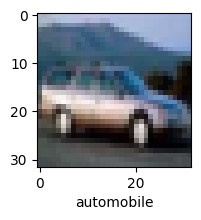

In [46]:
plot_sample(X_train,y_train,4)

In [47]:
classes[y_classes[4]]

'deer'

In [48]:
#USING THE CNN MODEL 

In [49]:
cnnmodel = keras.Sequential([
    # CNN
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, activation='relu', kernel_size=(3, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(10, activation='softmax')
])

cnnmodel.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [50]:
cnnmodel.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 45s 10ms/step - loss: 1.6845 - accuracy: 0.3688
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2854 - accuracy: 0.5420
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1232 - accuracy: 0.6085
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0171 - accuracy: 0.6508
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9297 - accuracy: 0.6808


In [52]:
cnnmodel.evaluate(X_test,y_test)

313/313 [==============================] - 6s 4ms/step - loss: 0.9253 - accuracy: 0.6782


[0.9252961874008179, 0.6782000064849854]

In [53]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [54]:
y_pred=cnnmodel.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.3131174e-03, 1.7007996e-04, 8.8659286e-02, 3.7250894e-01,
        7.0659546e-03, 5.0005329e-01, 1.1999574e-02, 1.2427345e-02,
        2.3318417e-03, 4.7059258e-04],
       [1.0944027e-02, 9.3796756e-03, 2.0650954e-05, 1.3488562e-05,
        5.7329116e-06, 7.1559202e-07, 1.3232558e-06, 2.4748084e-07,
        9.7943980e-01, 1.9436251e-04],
       [2.0532975e-01, 1.7019044e-01, 3.8395863e-02, 4.0525939e-02,
        3.7617590e-02, 1.5911171e-02, 1.8359022e-02, 1.7576253e-02,
        2.5720146e-01, 1.9889255e-01],
       [7.8004640e-01, 3.7348305e-03, 7.8415029e-02, 5.1455009e-03,
        4.2124573e-02, 1.1509580e-03, 2.3020795e-03, 7.9821527e-04,
        7.9839438e-02, 6.4429729e-03],
       [1.7948794e-06, 2.3367193e-06, 2.4158930e-02, 8.2065267e-03,
        5.2398834e-02, 1.0163008e-03, 9.1420472e-01, 9.4623865e-06,
        3.5579117e-07, 7.5028845e-07]], dtype=float32)

In [55]:
y_classes = [np.argmax(e) for e in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [56]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [57]:
#Plotting one of  the sample from the Test data set

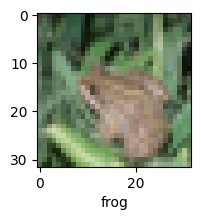

In [58]:
plot_sample(X_test,y_test,4)

In [59]:
#Predicted output using the model

In [60]:
classes[y_classes[4]]

'frog'